In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv -O bike_sharing.csv

--2023-09-25 19:16:26--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.161.245.179, 18.161.245.134, 18.161.245.27, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.161.245.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv’

bike_sharing.csv    100%[===================>] 633.16K  --.-KB/s    in 0.08s   

2023-09-25 19:16:27 (8.17 MB/s) - ‘bike_sharing.csv’ saved [648353/648353]



---

# Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Problem Statement

The company wants to understand/find the following:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands ?
- Check if "working" day has an effect on the number of electric cycles rented
- Check if no. of cycles rented is similar or different in different weather and season
- Check if weather is dependent on the season.

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, shapiro, levene
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import t, ttest_1samp, norm, ttest_ind, ttest_rel, binom, geom, chisquare, chi2_contingency, f_oneway

In [3]:
dataset = pd.read_csv('bike_sharing.csv')

In [4]:
dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
dataset.shape

(10886, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Check for null values
dataset.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Statistical Summary

- There are 10886 rows and 12 columns.
- Columns such as season, holiday, workingday, weather are categorical. We'll be converting them to categorical.
- datetime column can be treated as categorical/continuous depending on the time of analysis we're going to perform. We'll convert that column to datetime dtype.
- temp: ranges from .82 to 41 degree Celsius. Average temp is 20.23 degree Celsius.
- atemp: ranges from .76 to 45.45 degree Celsius. Average temp is 23.65 degree Celsius.
- humidity: range 0 to 100. Mean: 61.89
- windspeed: Ranges from 0 to 56.99. Average being 12.79
- casual: Count of casual users, ranges from 0 to 367. Mean : 36
- registered: Count of registered users, ranges from 0 to 886. Mean : 155
- count: Total count o,f users casual + registered users. Ranges from 1 to 977. Mean: 192
- There are no null values in the dataset.
- Seems like the data is captured with one hour interval starting from Jan 1 2011 - Dec 19 2022

---

In [9]:
# Copying the dataset before modifying
df = dataset.copy()

In [10]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
# Convert required columns to categorical

categorical_vars = ['season', 'holiday', 'workingday', 'weather']
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for i in categorical_vars:
  df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


---

## Visual Analysis

### Univariate

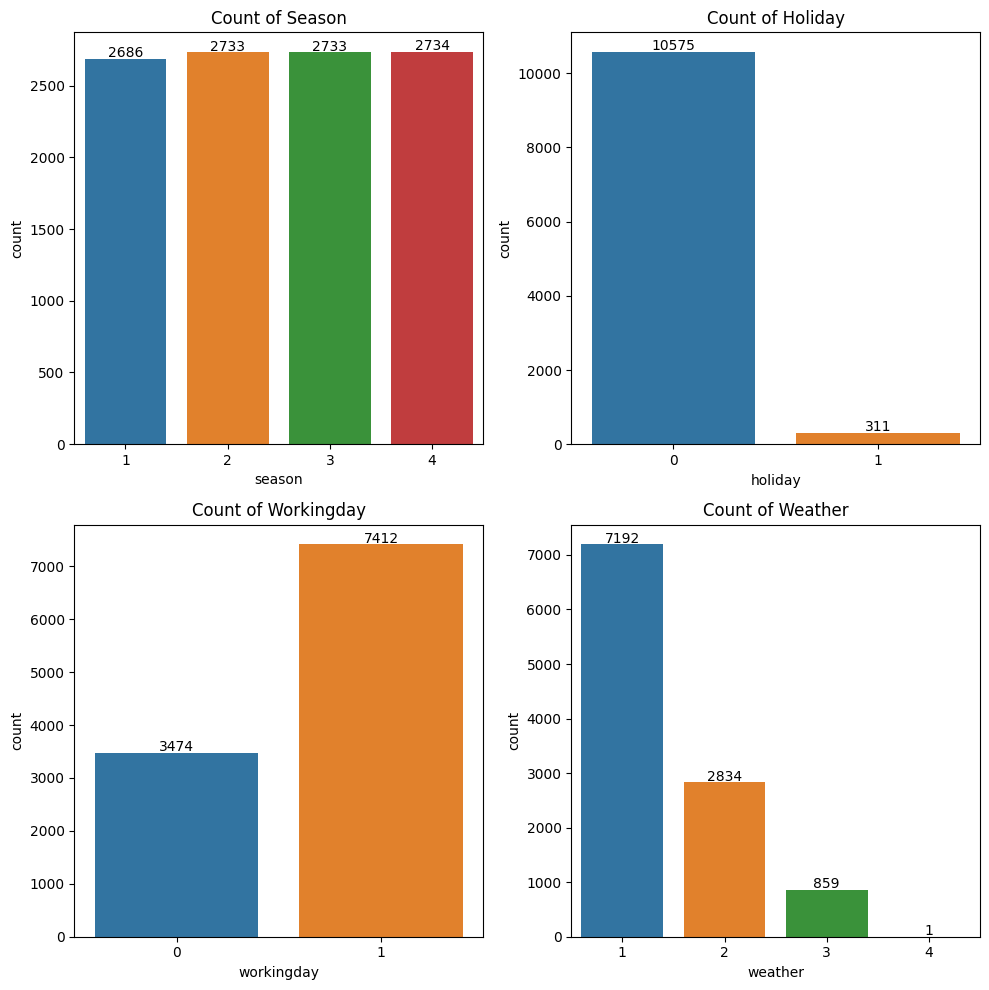

In [13]:
# Count of categorical variables

fig, axes = plt.subplots(2, 2, figsize=[10, 10])
axes = axes.ravel()
for i, var in enumerate(categorical_vars):
    pol = sns.countplot(data=df, x=var, ax=axes[i])
    for p in pol.patches:
        height = p.get_height()
        pol.annotate('{:1.0f}'.format(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 4), textcoords='offset points')
    axes[i].set_title('Count of ' + var.capitalize())
plt.tight_layout()
plt.show()

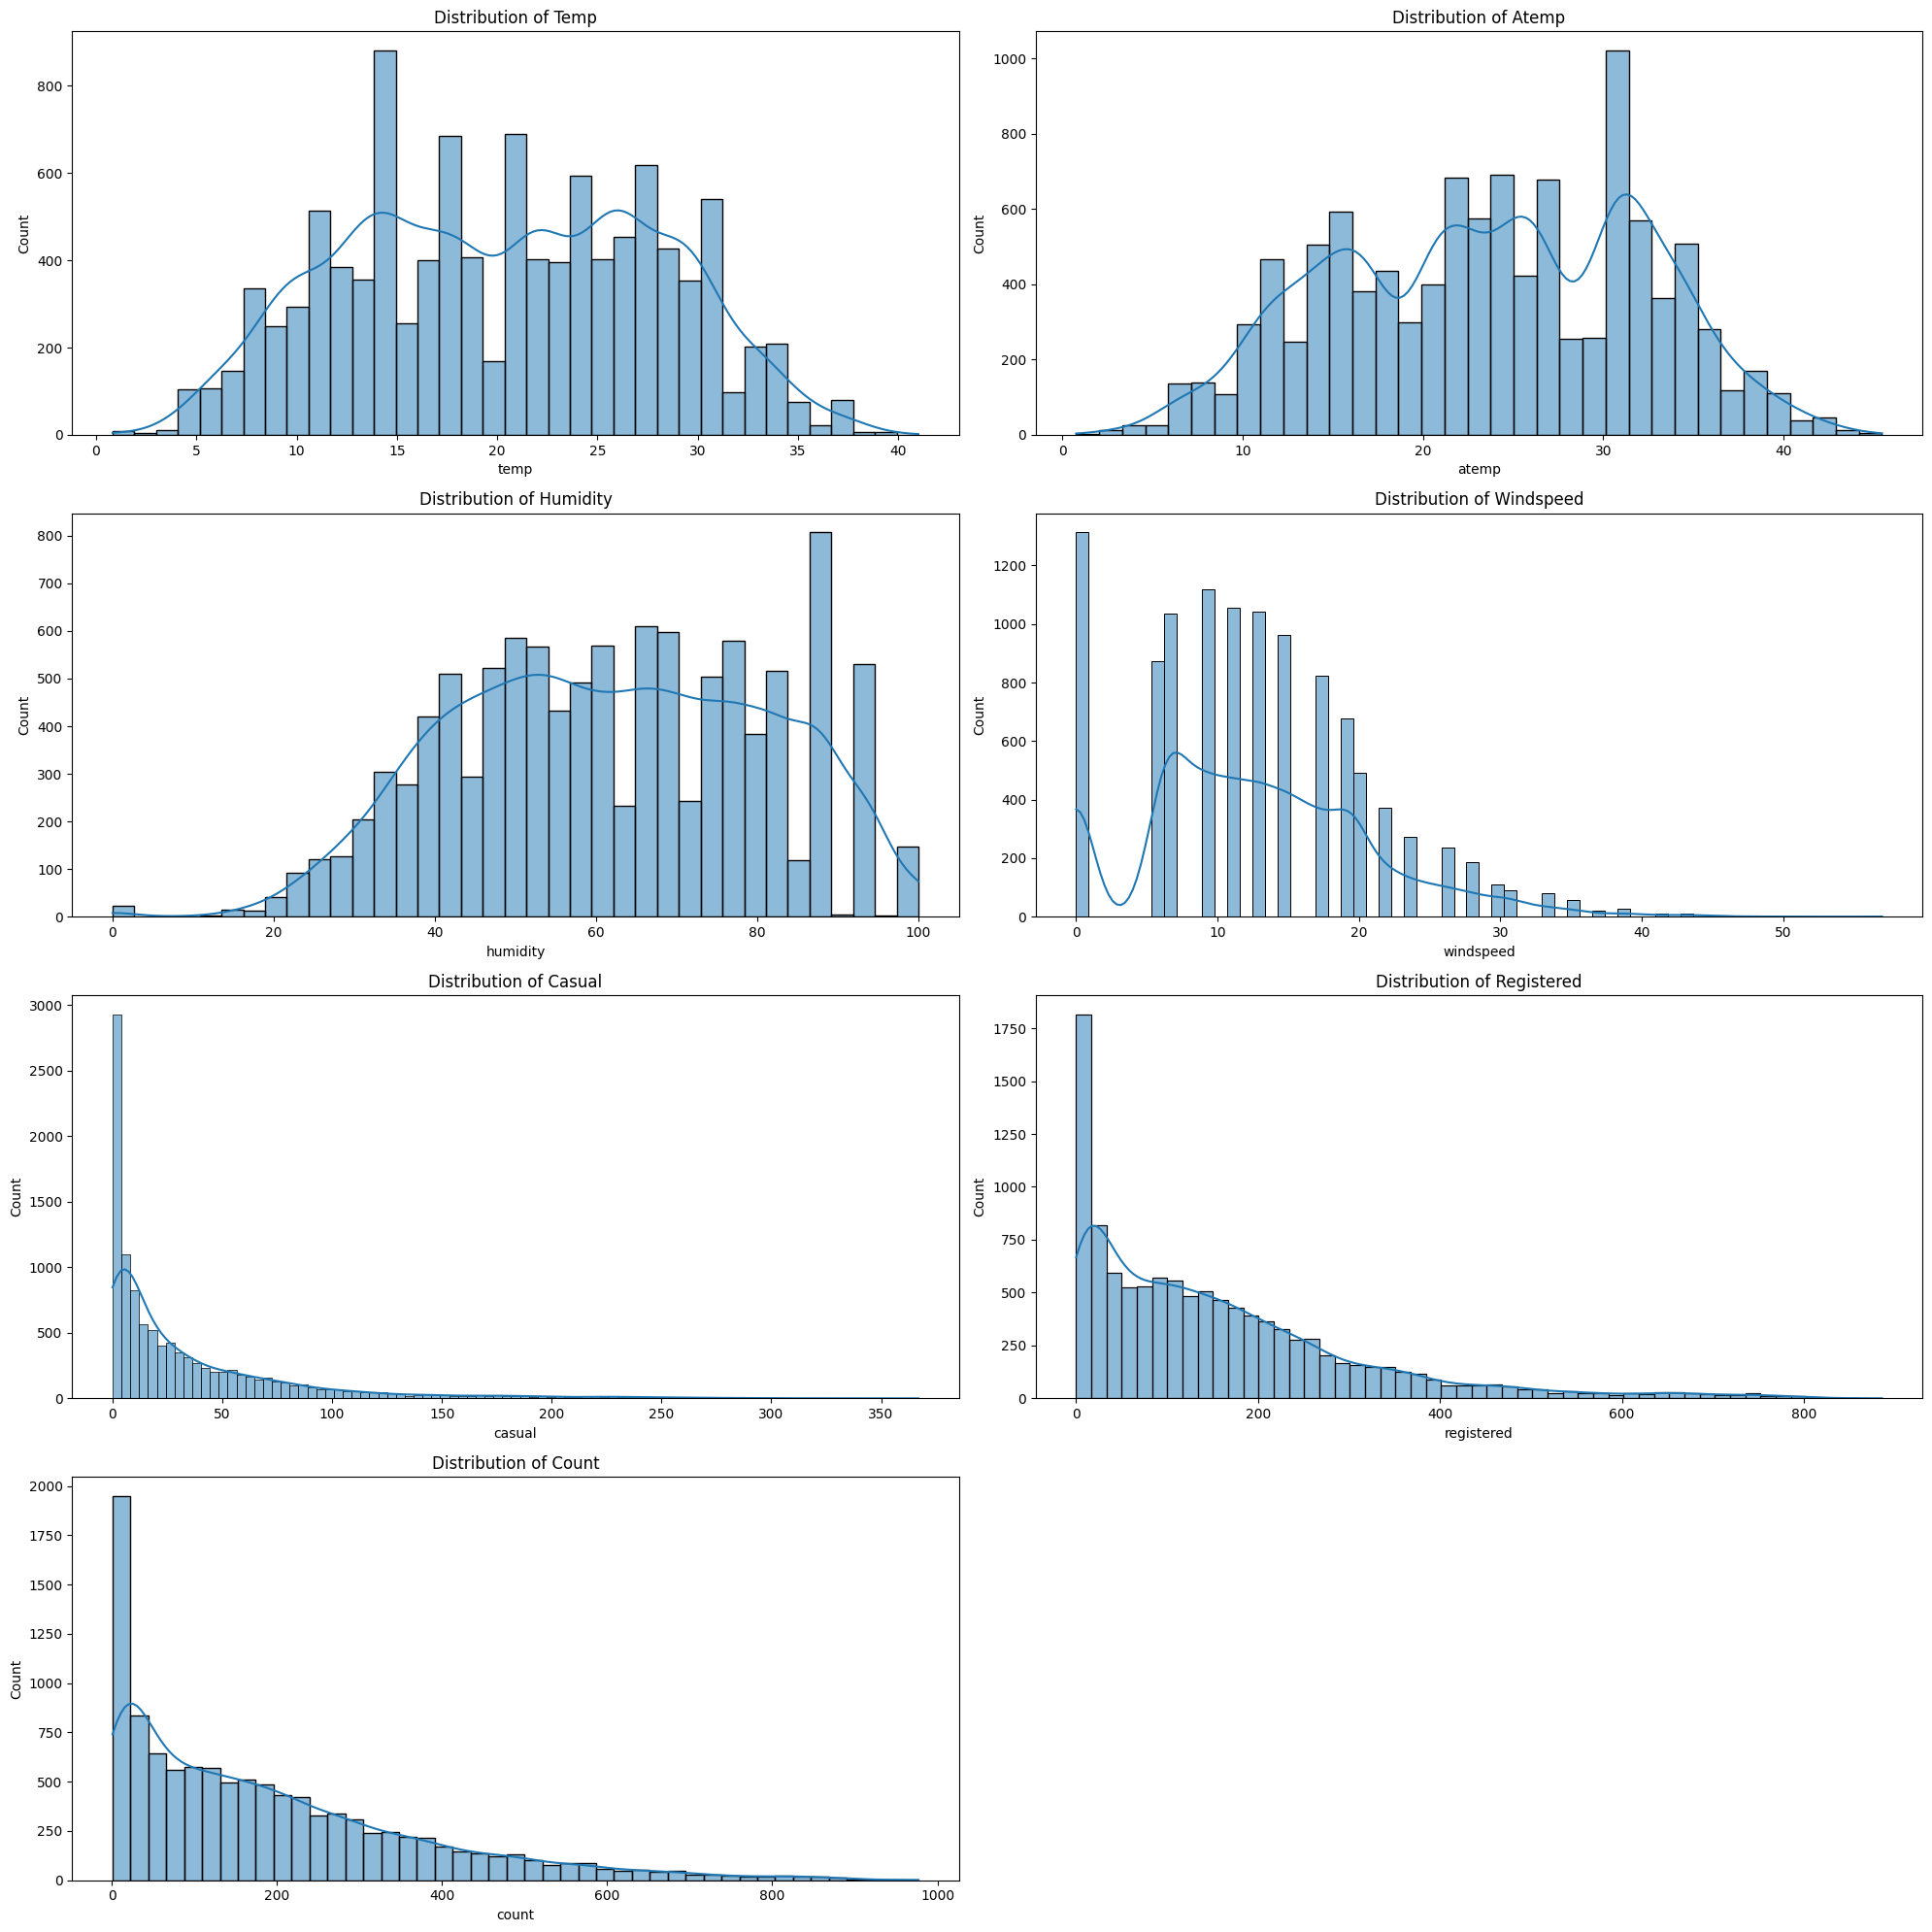

In [14]:
# Distribution of numerical variables

fig, axes = plt.subplots(4, 2, figsize=[20, 20])
axes = axes.ravel()
for i, var in enumerate(numerical_vars):
    sns.histplot(data=df, x=var, ax=axes[i], kde=True)
    axes[i].set_title('Distribution of ' + var.capitalize())
fig.delaxes(axes[7])  
plt.tight_layout()
plt.show()

In [15]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek 
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


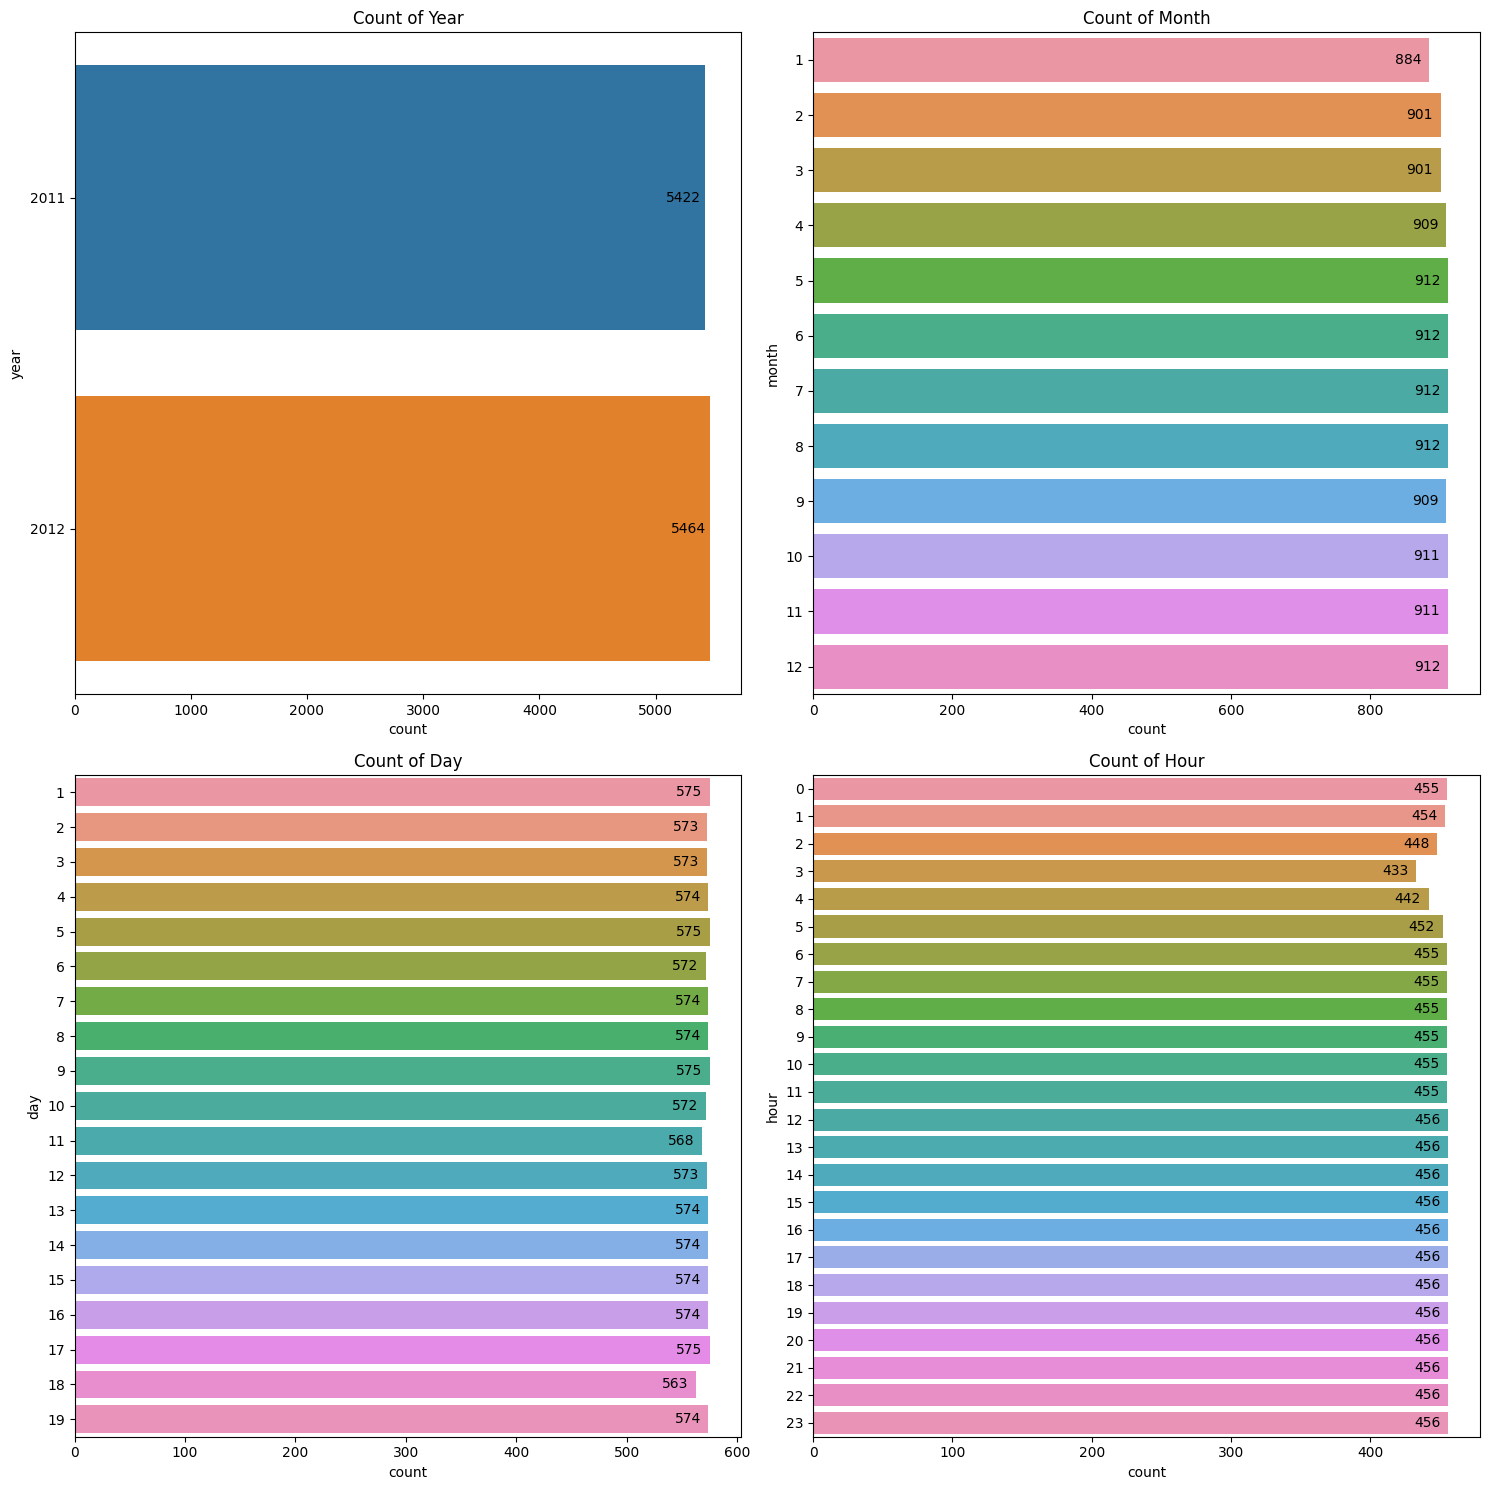

In [16]:
datetime_vars = ['year', 'month', 'day', 'hour']
fig, axes = plt.subplots(2, 2, figsize=[15, 15])
axes = axes.ravel()
for i, var in enumerate(datetime_vars):
    pol = sns.countplot(data=df, y=var, ax=axes[i])
    for p in pol.patches:
        width = p.get_width()
        pol.annotate('{:1.0f}'.format(width), (width, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(-15, 0), textcoords='offset points')
    axes[i].set_title('Count of ' + var.capitalize())
plt.tight_layout()
plt.show()

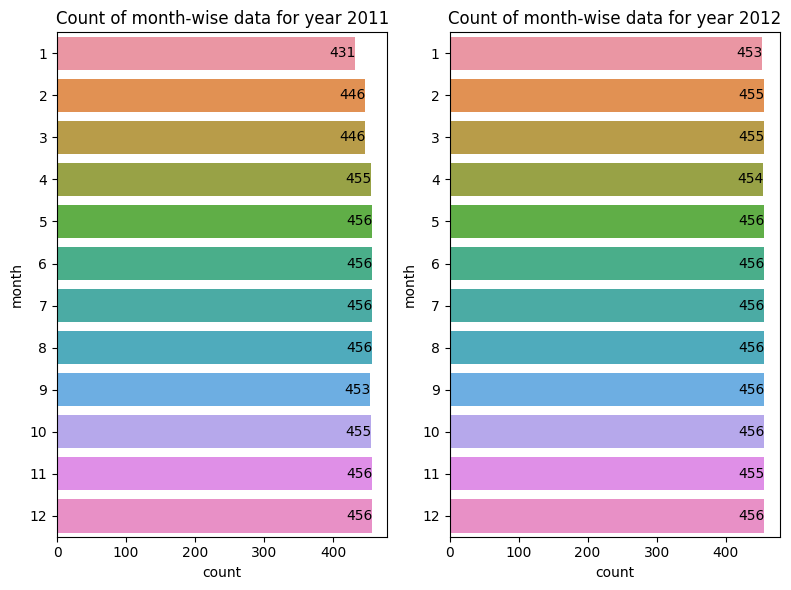

In [17]:
# To check why 2011 data is lesser than 2012
fig, axes = plt.subplots(1, 2, figsize=[8, 6])
axes = axes.ravel()
for i, var in enumerate([2011, 2012]):
  pol=sns.countplot(y='month', data=df[df['year'] == var], ax=axes[i])
  for p in pol.patches:
      width = p.get_width()
      pol.annotate('{:1.0f}'.format(width), (width, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(-9, 0), textcoords='offset points')
  axes[i].set_title('Count of month-wise data for year ' + str(var))  
plt.tight_layout()
plt.show()


#### Observations:

##### Categorical variables:
- Season: The data points are almost evenly distributed across all seasons, with Season 4 (winter) having slightly more data points.
- Holiday: There are 311 holidays across the full dataset and 10575 working days
- Workingday : There are 7412 working days and 3474 non-working days.
- Weather: Weather 1 dominates amongst all the other weather conditions. Meaning it's mostly clear and few clouds. The second weather condition that's common is mist. Third being the light rain and thunderstorms. Heavy rain occured only once in this 4,370 days.

##### Numerical variables:
- Temp and atemp: The distributions are quite similar, showing a somewhat normal distribution with a slight skew to the right. Most of the data points are centered around 20-30 degrees Celsius.
- humidity: The distribution is somewhat uniform but has a peak around 60-80, indicating that most days have humidity levels in that range.
- windspeed: The distribution is right-skewed, with most days having wind speeds less than 20 km/h
- casual and registered: Both distributions are right-skewed, indicating that on most days, the number of casual and registered rentals are relatively low. In general, there are more casual users than the registered.
- count: The distribution is right-skewed, which is expected given the distributions of the casual and registered variables.

##### Datetime variables:
- More data from 2012 than 2011 because Jan 2011 has less data.
- There are days from 1 - 19.
- Dataset contains data from all months, and from all hours of the day.
- Data is nearly equally distributed amongst different months, days, and hours.

---

### Bivariate Analysis

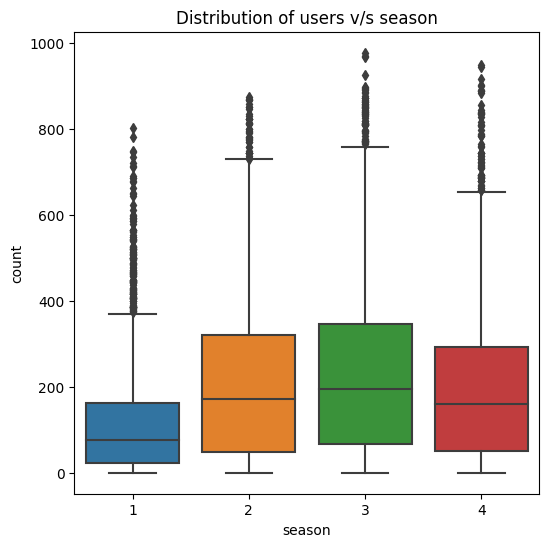

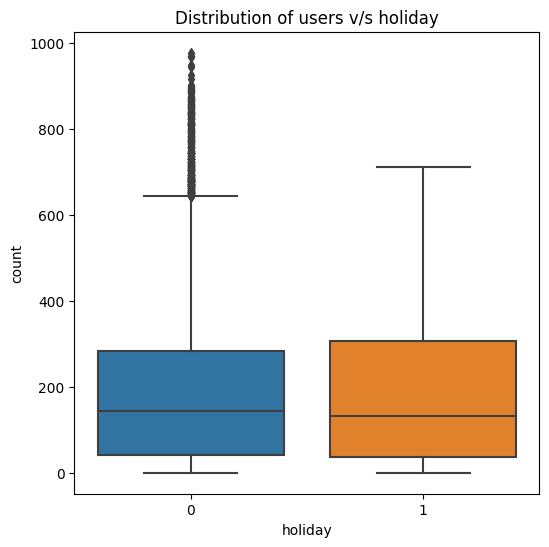

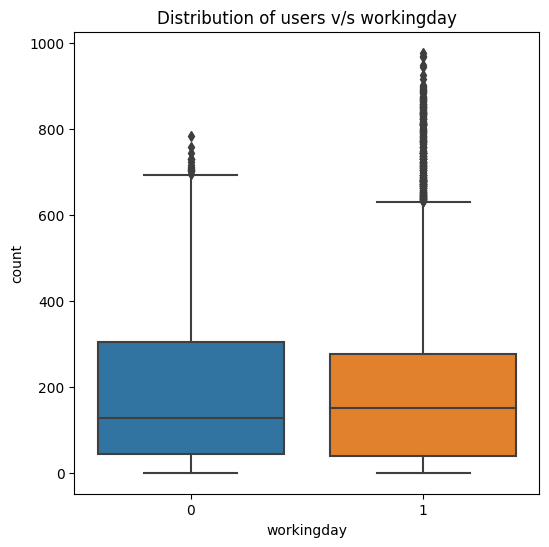

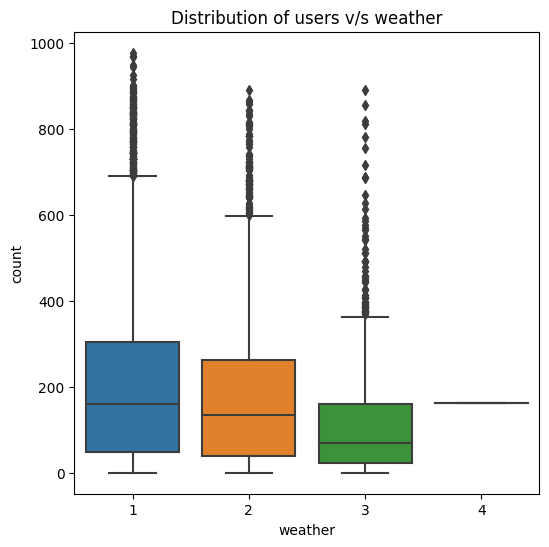

In [18]:
for i in categorical_vars:
  plt.figure(figsize=[6,6])
  sns.boxplot(y='count', x=i, data=df)
  plt.title('Distribution of users v/s ' + i)
  plt.show()

#### Observations:
- The median rental count is highest in Season 3 (fall) and lowest in Season 1 (spring). This could be that people prefer renting bikes during the fall season in this region.
- The median rentals on holidays and non-holidays seem to be quite close. However, the holidays have a larger spread in bike rental counts than non-holidays for the middle 50% of the data.
- Working days have a slightly higher median bike rental count than non-working days. This could be due to daily commuters using the service for their work commute.
- As expected, clear or partly cloudy days (labeled as 1) have the highest median bike rentals. Adverse weather conditions, such as light snow or heavy rain (labeled as 3 and 4), show a decline in bike rentals. This makes sense, as people are less likely to rent bikes in unfavorable weather conditions.

---

### Outliers:

Here we see there are potential outliers among all categories of weather, season, holiday and workingday. Although we can treat them, we do not know if these are genuine data points and treating them would give us different analysis and insights. So, understanding them could be crucial. In order to confirm that these are valid or not, we would need more details such as if there was any festive events, transport strikes, or any promotions or discounts that the company has offered. As these data is not available, the outliers are not going to be treated and the data is considered as such

---

### Analysis Continued

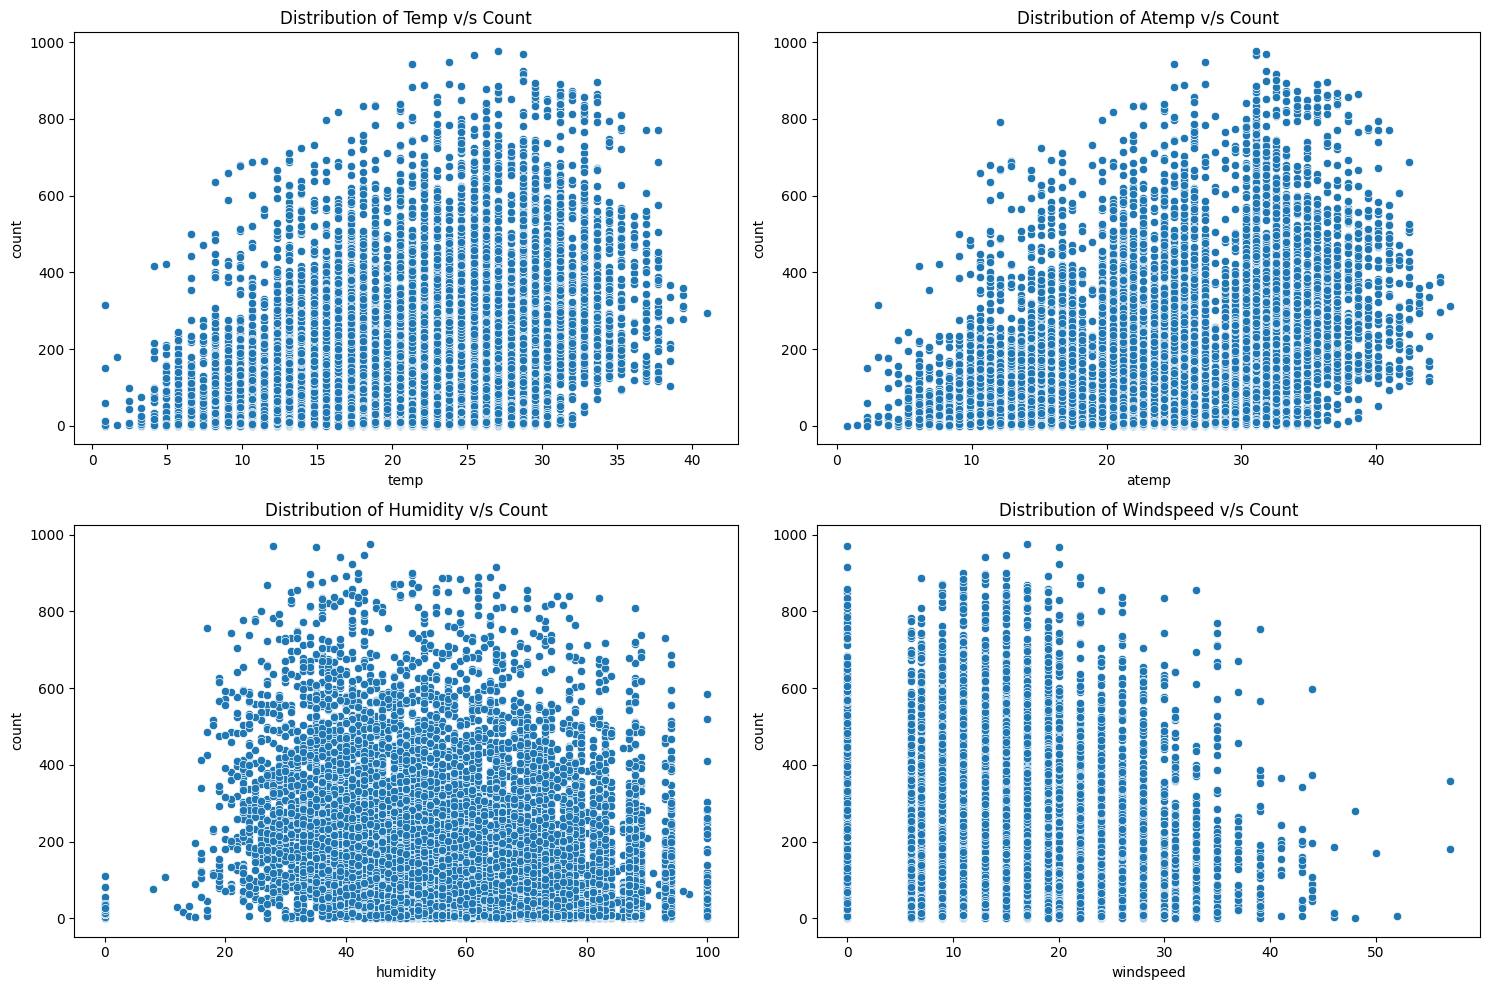

In [19]:
# Relationship between count and continuous variables ( excluding casual, registered and count itself)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i,var in enumerate(numerical_vars[:-3]):
  ax=axes[i//2, i%2]
  sns.scatterplot(x=var, data=df, y='count', ax=ax)
  ax.set_title('Distribution of '+ var.capitalize()+ ' v/s Count')

plt.tight_layout()
plt.show()


#### Observations:
- There's a positive correlation between temperature and number of bike rentals.
- There's a positive correlation between "feeling" temperature and number of bike rentals.
- No clear trend is observed, but we can see a wide distribution of bike rentals across various humidity levels.
- At lower windspeeds, there are more bike rentals. As it increases, fewer number is observed.


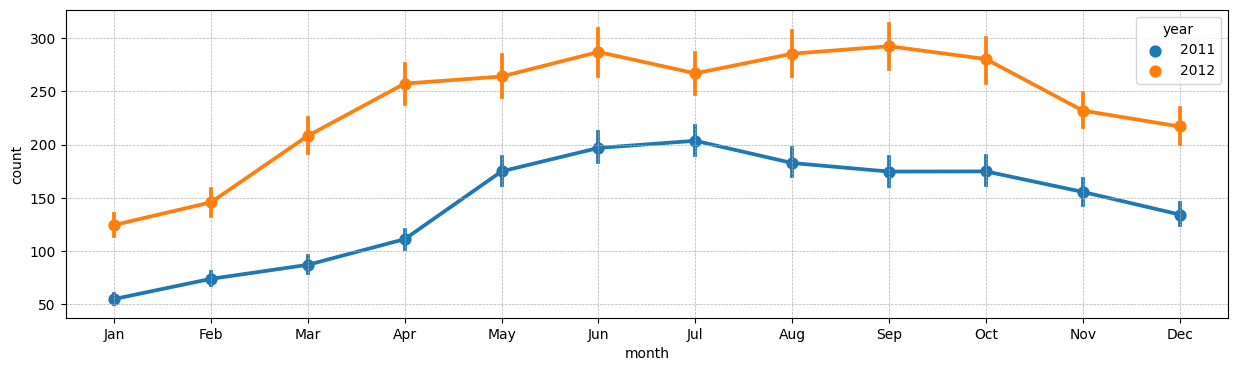

In [20]:
# Monthly trend

plt.figure(figsize=[15,4])
sns.pointplot(x='month', y='count', hue='year', data=df)
plt.xticks(ticks=range(12),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

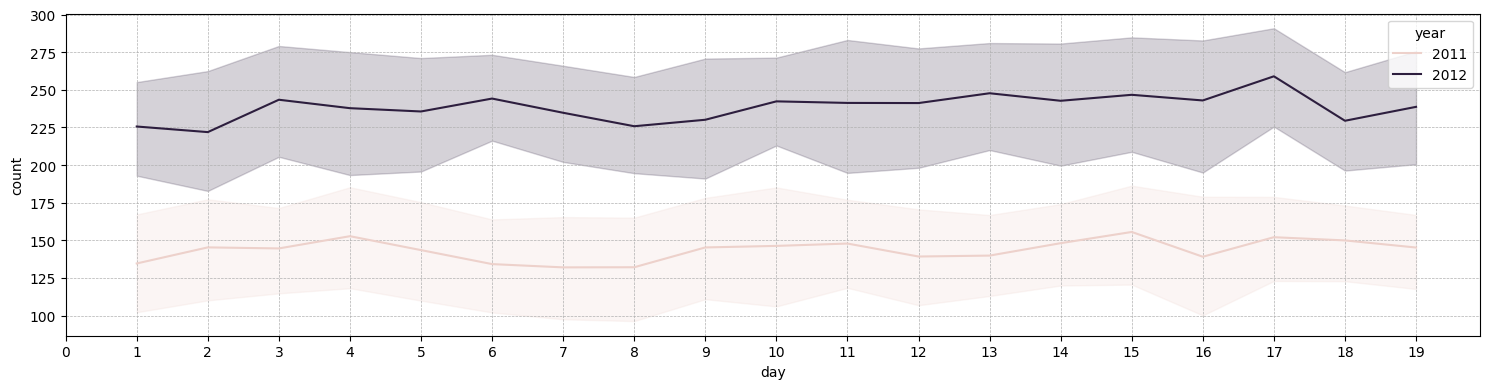

In [21]:
# Daily trend v/s year

plt.figure(figsize=[15,4])
sns.lineplot(x='day', y='count', data=df.groupby(['year','month','day'])['count'].mean().reset_index(), hue='year')
plt.xticks(ticks=range(20),labels=range(20))
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

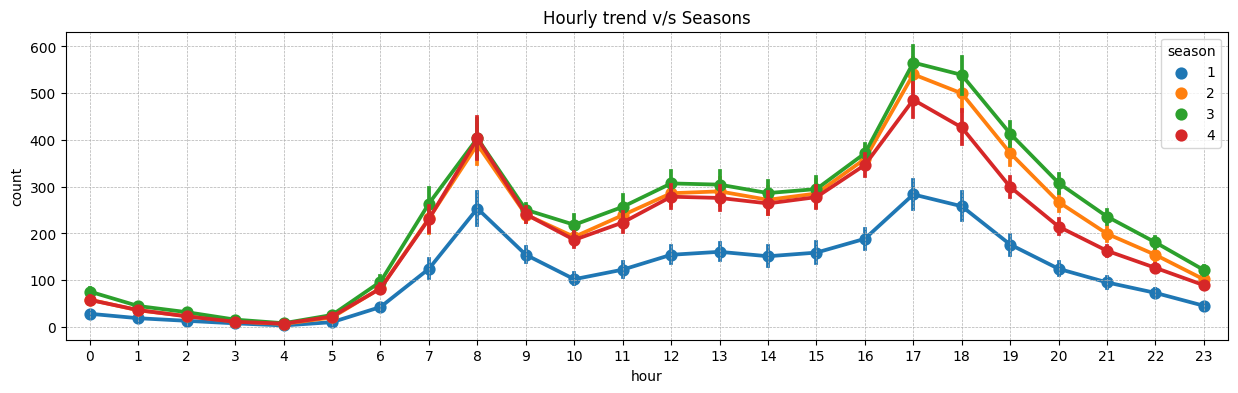

In [22]:
# Hourly trend on different seasons

plt.figure(figsize=[15,4])
sns.pointplot(x='hour', y='count', data=df, hue='season')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title('Hourly trend v/s Seasons')
plt.show()

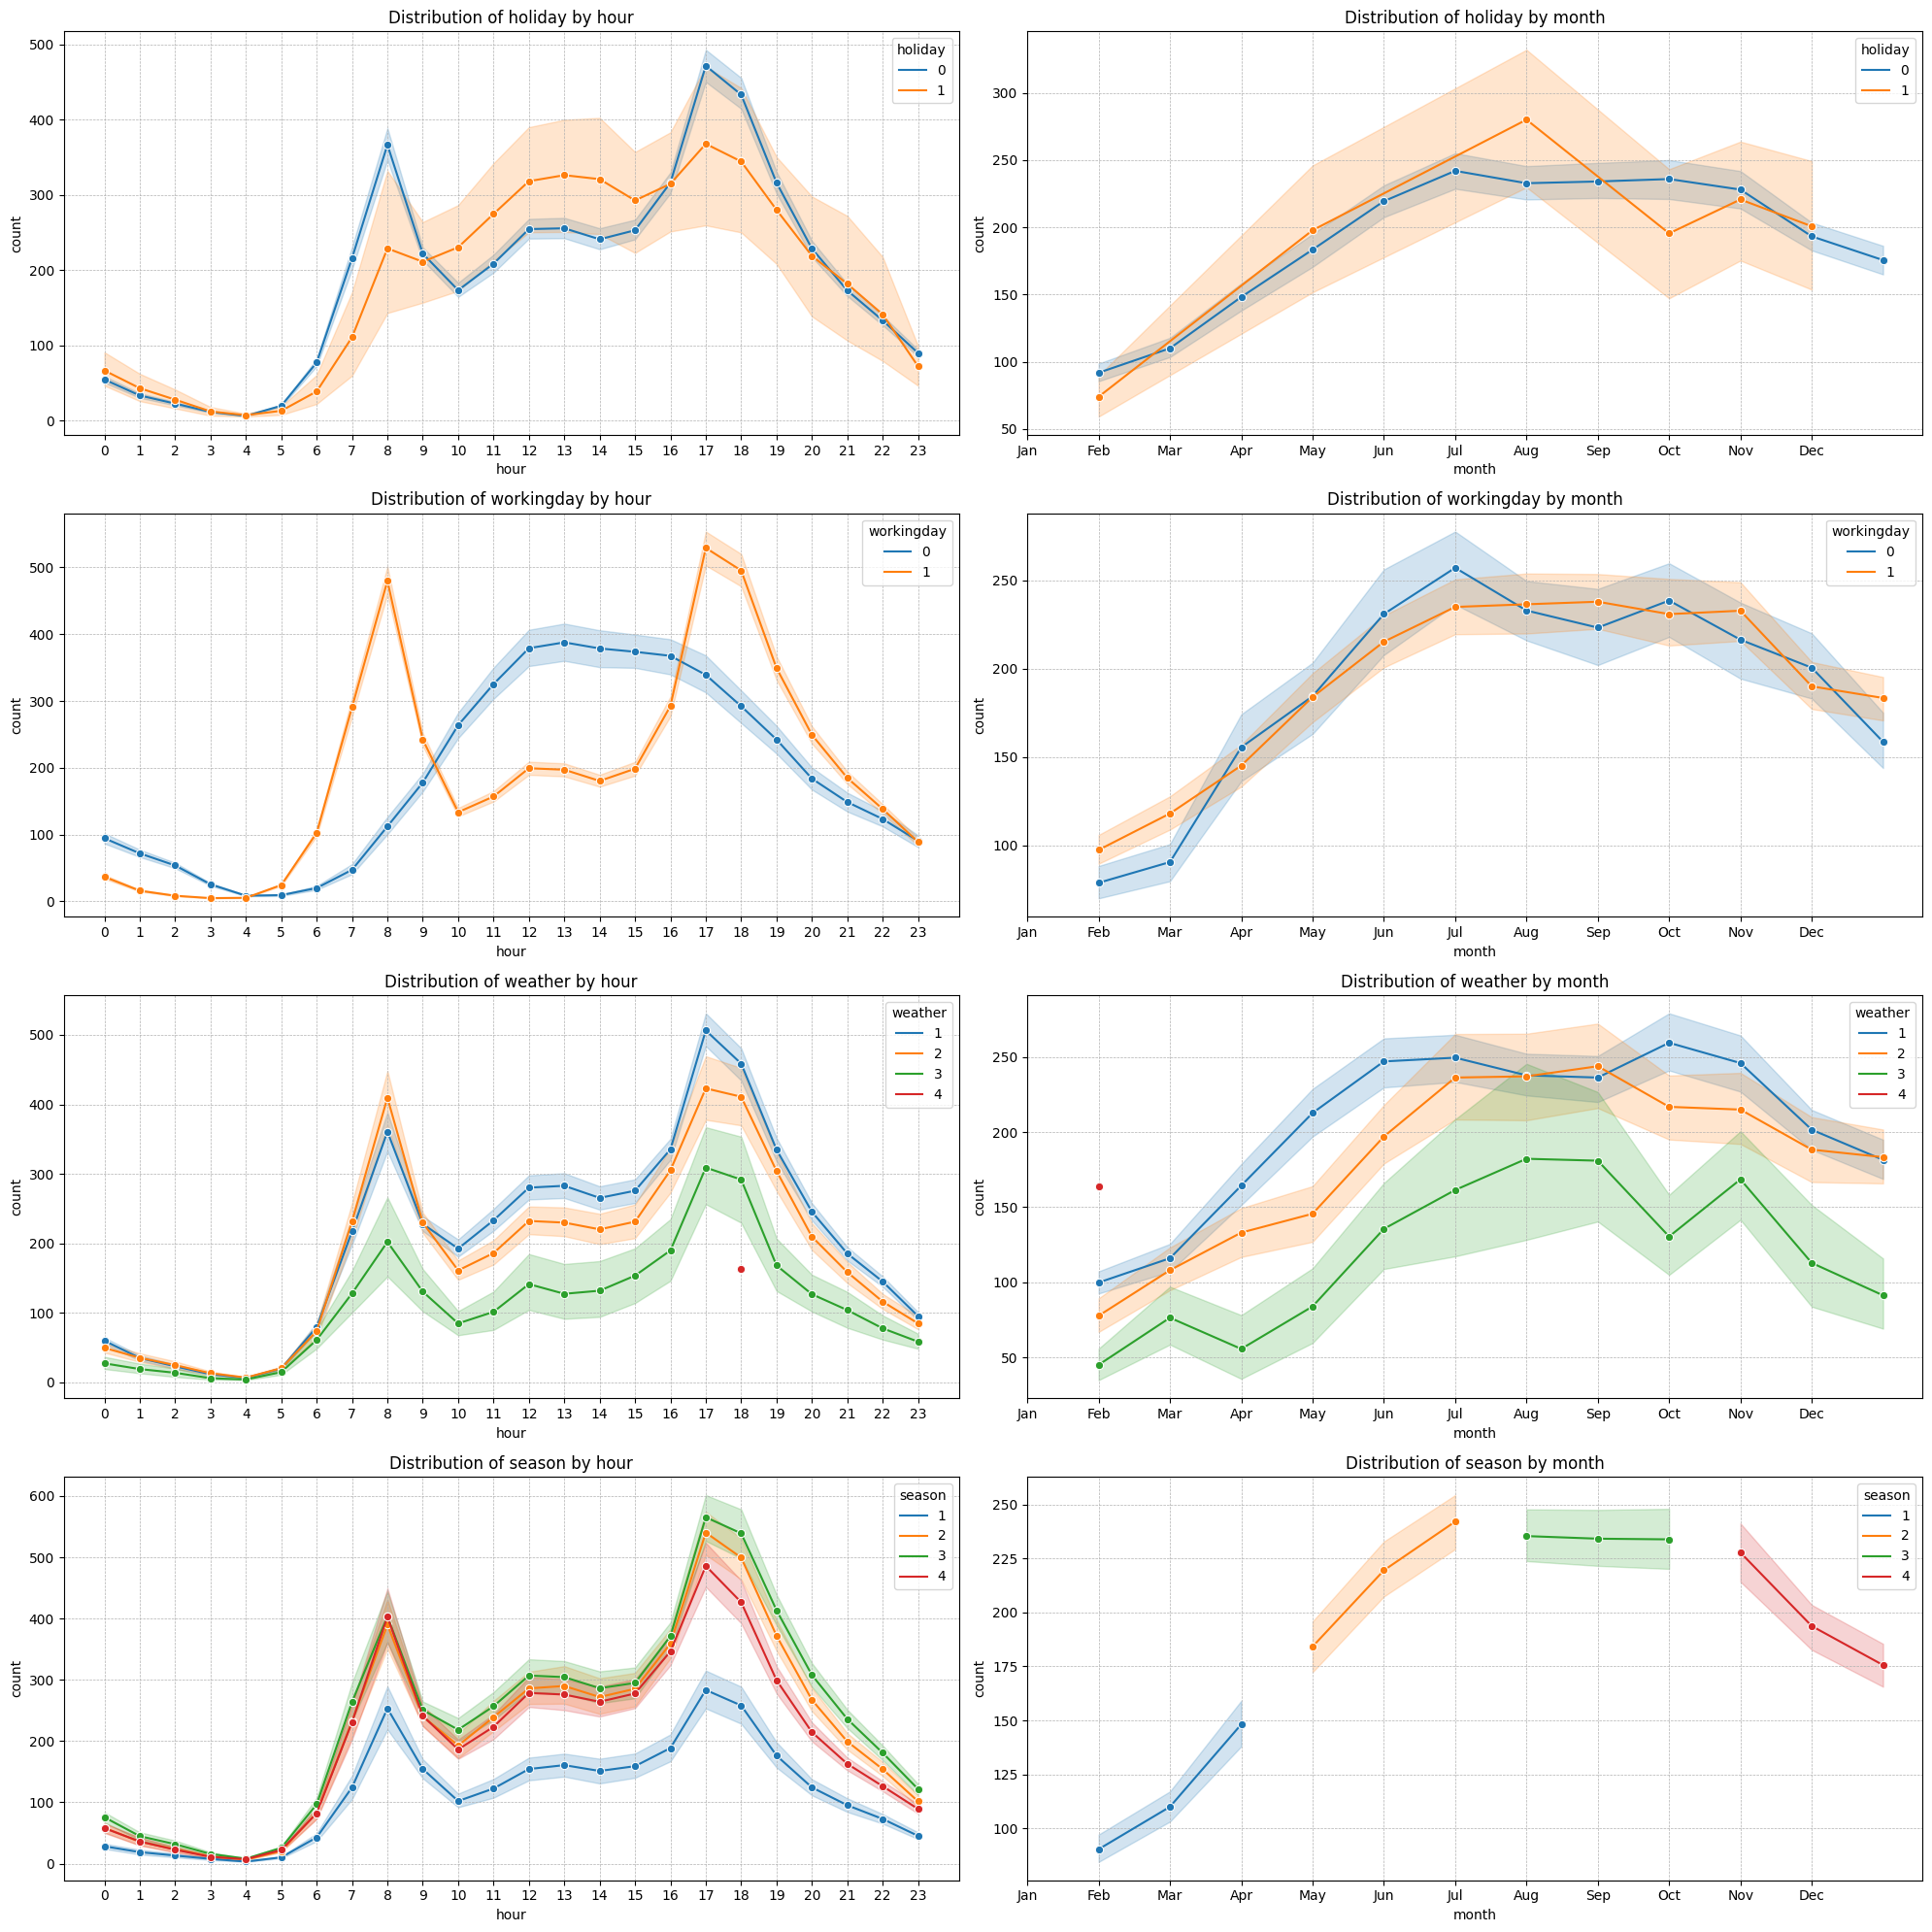

In [23]:
#Hourly and Montly trend by weather, workingday, and holidays
fig, axes = plt.subplots(nrows=4, ncols =2, figsize=[20,20])

for j, var in enumerate(['hour','month']):
  for i, var2 in enumerate(['holiday', 'workingday', 'weather','season']):
    ax = axes[i,j]
    sns.lineplot(x=var, y='count', data=df, hue=var2, ax=ax, marker='o')
    if var == 'hour':
      ax.set_xticks(ticks=range(24),labels=range(24))
    else:
      ax.set_xticks(ticks=range(12),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_title('Distribution of '+ var2 + ' by '+var)
    ax.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
    

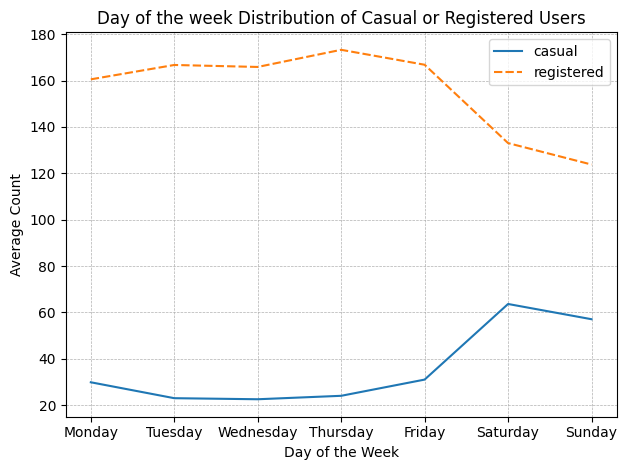

In [24]:
# Day of the week distribution of Casual or Registered Users.

dayofweek_distribution = df.groupby('dayofweek')[['casual' ,'registered']].mean()
sns.lineplot(dayofweek_distribution)
plt.title('Day of the week Distribution of Casual or Registered Users')
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()

#### Trend Observations:
- Monthly trend - Count is increasing from Jan and peaks in June and stabilized till Oct and decreases from November to December, probably because of the winter. The average count of rentals in 2012 is higher than in 2011, highlighting the growth of the service.
- Daily trend - In 2012, we have more users than 2011. This chart shows the comparison of day 1-19 yearly wise.
- Hourly trend v/s Seasons - Count increases from 6 AM and we see a sharp peak at 8 AM across all seasons. Probably because people are going to work/school. And, the second peak is around 5 - 6 PM, this probably because the return commute of the work/school people. Post 6 PM, users start to decline and starts increasing from 6AM.
- Season 3 sees the most number of users of the bikes, followed by Season 2 and Season 4 and season 1 has the lowest among all hours.
- Distribution of holiday by:
  - hour: The morning and evening peaks are more pronounced on non-holidays, likely due to work/school commutes. On holidays or weekends, the hourly pattern is different. The bike rentals start increasing from around 8 AM, peak in the midday hours from 10 AM to 4 PM, and then gradually decrease. This suggests recreational or leisure use of bikes on non-working days.
  - month: The trend remains consistent throughout the year, with non-holidays witnessing higher bike rentals.
- Distribution of workingday by:
  - hour: Similar to the holiday trend, the pronounced peaks during commute hours are evident on working days. Non-working days, on the other hand, have more even distributions with increased mid-day rentals.
  - month: The trend is consistent throughout the year, with working days having higher bike rentals.
- Distribution of weather by:
  - hour: Clear and partly cloudy days witness the highest rentals throughout the day, while adverse conditions like heavy rain and snow lead to decreased rentals.
  - month: Clear and partly cloudy days consistently have the highest rentals across all months. Adverse weather conditions naturally reduce the number of rentals, especially heavy rain and snow.
- Day of the Week Distribution:
  - Registered users are more in number than casual users during weekdays. This could be because the registered users use the bikes for commute to work/school. We also decline in the number of average users during the weekends, which confirms our notion.
  - On the other hand, casual users' activity increased towards the weekends which suggests that they could be using the bike for leisure or recreational activites.

 
#### Insights:
- There's an evident growth in rentals from 2011 to 2012.
- Seasonal trends highlight peak bike usage during warmer months (summer to fall).
- Adverse weather conditions significantly impact bike rentals, emphasizing the importance of weather forecasts in operational decisions.
- Holidays & Working Days: The patterns suggest that the service is used heavily for work/school commutes. Promotions or marketing strategies can be tailored for weekends and holidays to increase rentals during these periods.
- On weekdays, registered users dominate the bike rentals. However, during weekends, the gap between casual and registered users narrows

## Coorelation

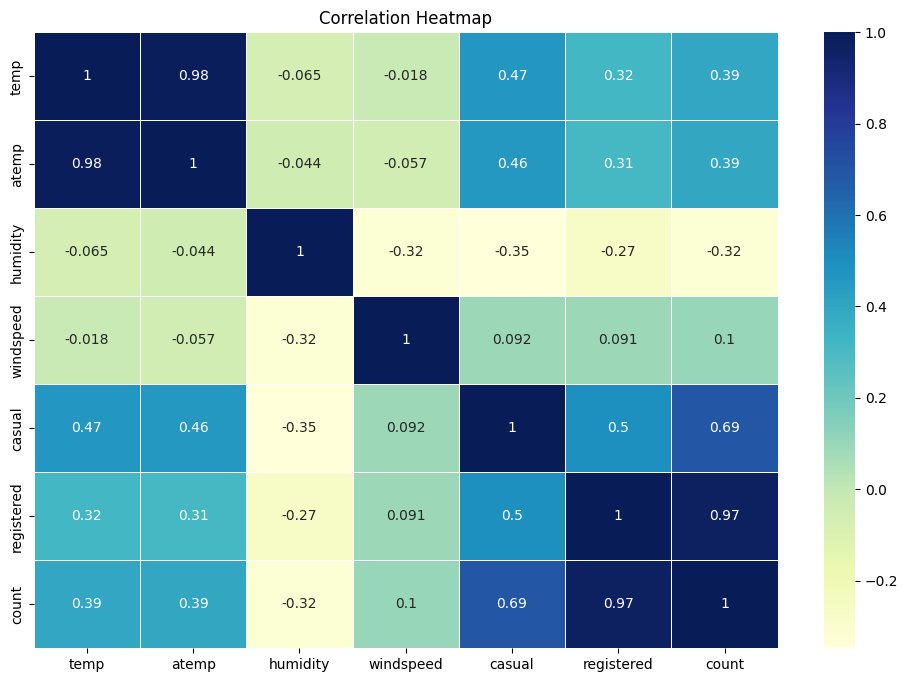

In [25]:
correlation_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
plt.figure(figsize=[12, 8])
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Observations:
- Both temp and atemp (feeling temperature) have a strong positive correlation with itself obviously and also with the count of casual, registered and the total count of users. This suggests that as the temperature increases, bike rentals also tend to increase.
- Humidity has a negative correlation with the bike rental count, but it's not very strong. This indicates that as humidity increases, bike rentals might decrease slightly.
- Wind speed has a weak correlation with bike rentals.
- Both casual and registered users show a positive correlation with the total count, which \is expected since the total count is a sum of both.
- Casual users have a higher correlation with temperature compared to registered users, indicating that casual users might be more influenced by good weather conditions.

---

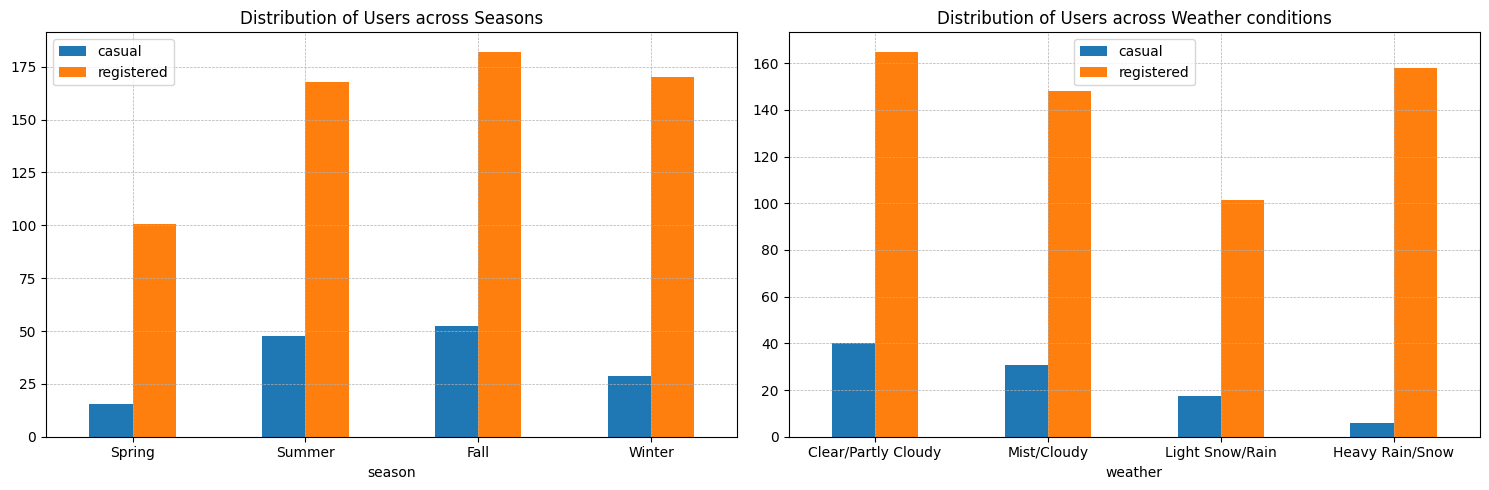

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Season v/s Users
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
season_users_distribution = df.groupby('season')[['casual', 'registered']].mean()
season_users_distribution.plot(kind='bar', ax=ax[0])
ax[0].grid(linestyle='--', linewidth=0.5)
ax[0].set_title('Distribution of Users across Seasons')
ax[0].set_xticklabels(season_labels, rotation=0)


#Weather v/s Users
weather_labels = ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
weather_users_distribution=df.groupby('weather')[['casual', 'registered']].mean()
weather_users_distribution.plot(kind='bar',ax=ax[1])
ax[1].grid(linestyle='--', linewidth=0.5)
ax[1].set_xticklabels(weather_labels, rotation=0)
ax[1].set_title('Distribution of Users across Weather conditions')

plt.tight_layout()
plt.show()


### Observations:
- Bike rentals are highest in the fall and lowest in the spring, with registered users renting bikes more consistently than casual users.
- Bike rentals are highest under clear or partly cloudy conditions and decrease with less favorable weather, with casual users being more sensitive to these changes.

## Hypothesis Testing

In [27]:
# We are assuming 95 % confidence level i.e. 5% significance level
alpha=.05 

# Creating functions for these hypothesis testing, visual checks for assumptions and Shapiro-Wilk and Levene's tests

def reject_or_fail_to(p_value, alpha=0.05):
    if p_value < alpha:
        return "Reject Null Hypothesis, Ho."
    else:
        return "Fail to reject Null Hypothesis, Ho."

def visual_plot_check(*dfs, labels):
    num_dfs = len(dfs)
    fig, ax = plt.subplots(nrows=num_dfs, ncols=2, figsize=(10, 5*num_dfs))
    
    for i, (df, label) in enumerate(zip(dfs, labels)):
        sns.histplot(df, kde=True, ax=ax[i, 0]).set_title(f'Histogram for {label}')
        probplot(df, plot=ax[i, 1])

    plt.tight_layout()
    plt.show()

def do_shapiro(*dfs, labels, sample_size=1000):
    for df, label in zip(dfs, labels):
        # Check if group size is greater than or equal to 3 as for Shapiro test the sample size should be greater than 3
        if len(df) >= 3:
            # Adjusting sample size if the group size is smaller
            sample_size_adjusted = min(sample_size, len(df))
            shap_stat, p_value = shapiro(df.sample(sample_size_adjusted, random_state=69))
            result = reject_or_fail_to(p_value)
            print(f"==> Shapiro Test for the group {label}:")
            if "Fail" in result:
                print(f"{result} So the group \"{label}\" follows normality.")
            else:
                print(f"{result} So the group \"{label}\" doesn't follow normality.")
            print("")
        else:
            print(f"Skipping Shapiro Test for the group {label} due to insufficient data points.")
            print("")


def do_levene(*dfs, labels):
    levene_stat, p_value = levene(*dfs)
    result = reject_or_fail_to(p_value)
    print("==> Levene's Test:")
    if "Fail" in result:
        print(f"{result} So the groups {', '.join(labels)} have equal variances.")
    else:
        print(f"{result} So the groups {', '.join(labels)} don't have equal variances.")
    print("")

def do_chi_square(df, col1, col2):

    # Constructing a contingency table
    contingency = pd.crosstab(df[col1], df[col2])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency)
    result = reject_or_fail_to(p_value)
    print(f"==> Chi-square Test for {col1} and {col2}:")
    if "Fail" in result:
        print(f"{result} So the variables \"{col1}\" and \"{col2}\" are independent.")
    else:
        print(f"{result} So the variables \"{col1}\" and \"{col2}\" are dependent.")
    print("")


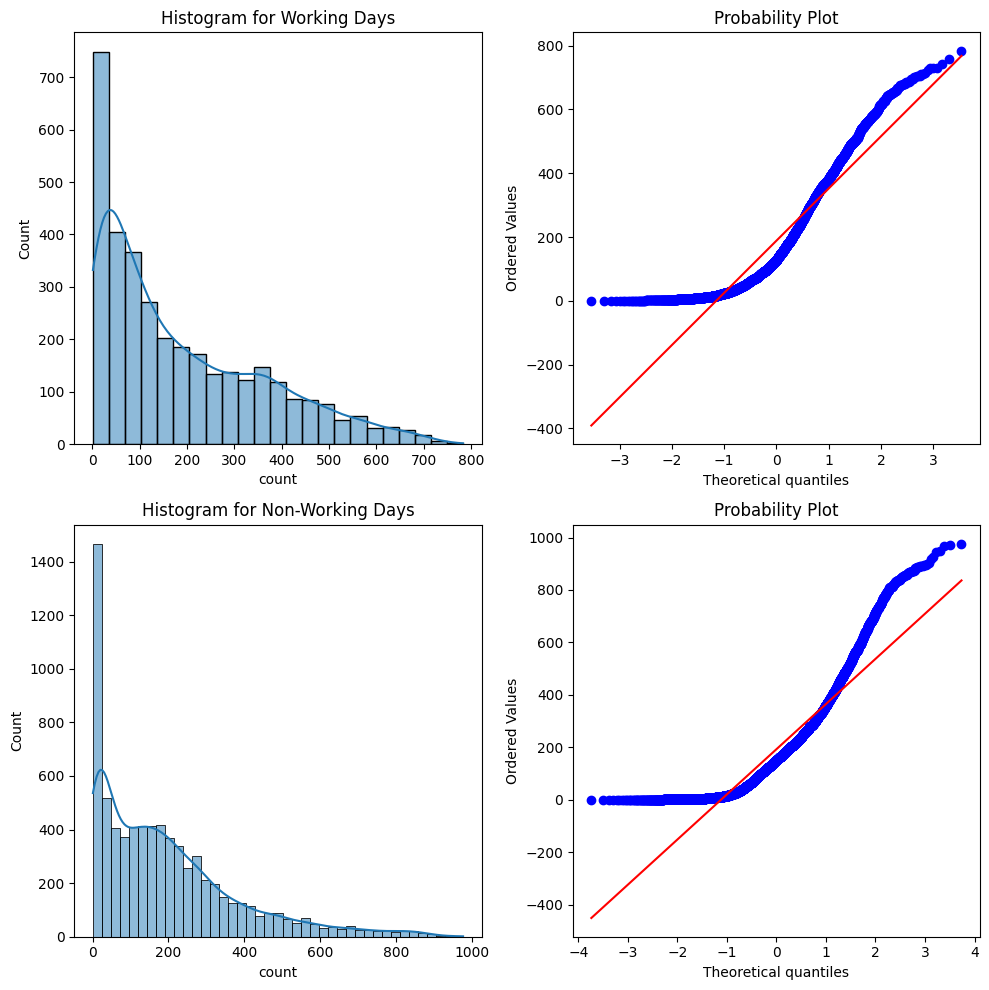

In [28]:
# To check if Working Day has an effect on the number of electric cycles rented
# For this we'll do 2-sample T-test

# Null Hypothesis, Ho = There is no significant difference between these two groups
# Alternate Hypothesis, Ha = There is a significant difference between these two groups.

workingday_group= df[df['workingday'] == 0]['count']
non_workingday_group = df[df['workingday'] == 1]['count']

# However, before we perform the hypothesis testing, let's confirm on the assumptions of the test.
# Normality: The dependent variable should be approximately normally distributed for each group of the independent variable.
# Equal Variance (Homoscedasticity): The variance of the dependent variable should be equal across groups.

  
# Visual plot to check for Normality and Homoscedasticity
visual_plot_check(workingday_group, non_workingday_group, labels=["Working Days", "Non-Working Days"])

- The histogram for both working and non-working days shows that the data is somewhat right-skewed. It doesn't perfectly match the bell-shaped curve expected for normally distributed data.
- In Q-Q plot, for both working and non-working days, many data points deviate from the straight line, especially in the tails. This indicates deviations from normality.
- Visual analysis doesn't affirm our assumptions to do these tests, so we'll do statistical tests such as Shapiro-Wilk test for normality and Levene's test for equal variances to confirm

In [29]:
# shapiro_for_working_result = shapiro(workingday_group.sample(1000))
# shapiro_for_nonworking_result = shapiro(non_workingday_group.sample(1000))

# Shapiro Test for Normality:
do_shapiro(workingday_group, non_workingday_group, labels=["Working Days", "Non-Working Days"], sample_size=1000)

#Levene's Test for Equal variances
do_levene(workingday_group, non_workingday_group, labels=["Working Days", "Non-Working Days"])


==> Shapiro Test for the group Working Days:
Reject Null Hypothesis, Ho. So the group "Working Days" doesn't follow normality.

==> Shapiro Test for the group Non-Working Days:
Reject Null Hypothesis, Ho. So the group "Non-Working Days" doesn't follow normality.

==> Levene's Test:
Fail to reject Null Hypothesis, Ho. So the groups Working Days, Non-Working Days have equal variances.



Although Shapiro-Wilk's normality test failed, we'll proceed with the 2-sample test and find out the p_value

In [30]:
# Reiterating null and alternate hypothesis
# Null Hypothesis, Ho = There is no significant difference between these two groups
# Alternate Hypothesis, Ha = There is a significant difference between these two groups.

t_stat, two_sample_p_value = ttest_ind(workingday_group,non_workingday_group)

print("Test Statistic, t : ", t_stat)
print("P-value : ", two_sample_p_value)
print("")
working_non_working_result=reject_or_fail_to(two_sample_p_value, alpha)
print("==> 2-sample test result for working and non-working days: \n", working_non_working_result)

Test Statistic, t :  -1.2096277376026694
P-value :  0.22644804226361348

==> 2-sample test result for working and non-working days: 
 Fail to reject Null Hypothesis, Ho.


As we can see that, p_value is much greater than alpha and so our null hypothesis is not rejected. We do not have sufficient evidence to confirm that the "workingday" affects the number of users renting the bikes.

---

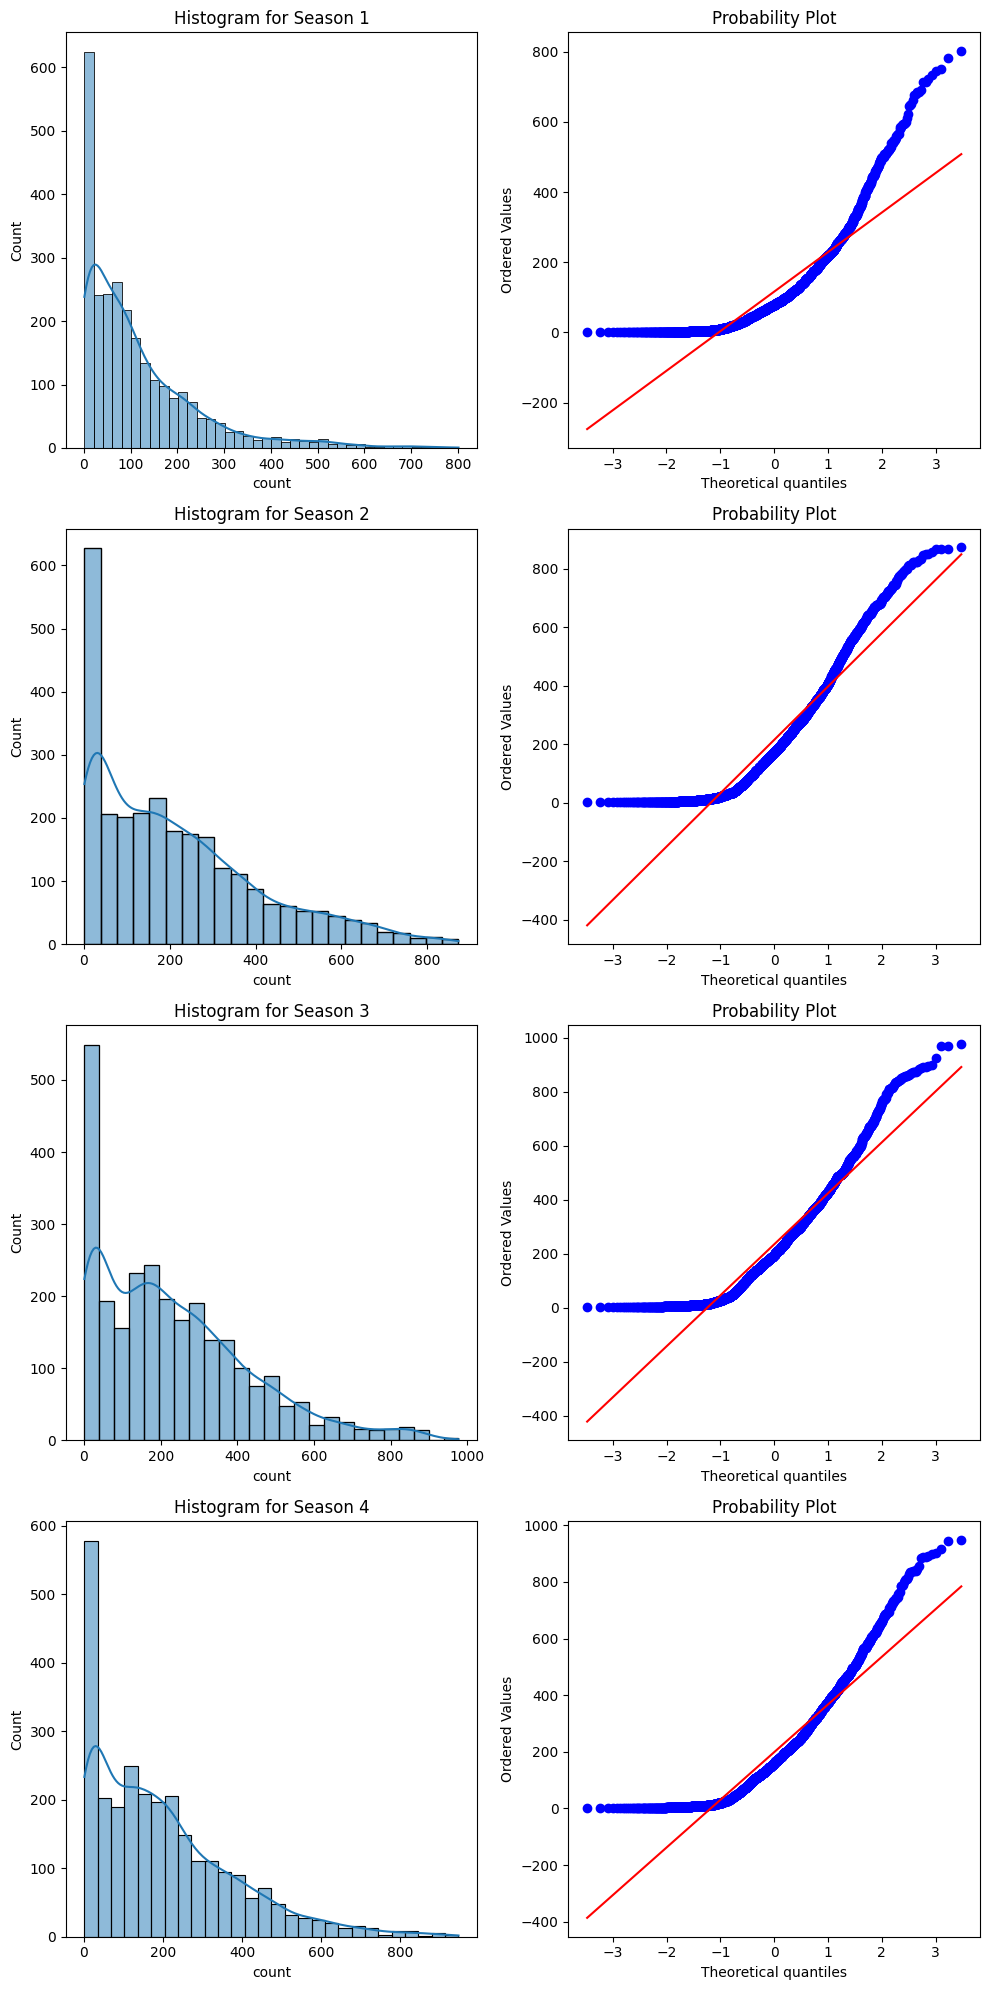

==> Shapiro Test for the group Season 1:
Reject Null Hypothesis, Ho. So the group "Season 1" doesn't follow normality.

==> Shapiro Test for the group Season 2:
Reject Null Hypothesis, Ho. So the group "Season 2" doesn't follow normality.

==> Shapiro Test for the group Season 3:
Reject Null Hypothesis, Ho. So the group "Season 3" doesn't follow normality.

==> Shapiro Test for the group Season 4:
Reject Null Hypothesis, Ho. So the group "Season 4" doesn't follow normality.

==> Levene's Test:
Reject Null Hypothesis, Ho. So the groups Season 1, Season 2, Season 3, Season 4 don't have equal variances.



In [31]:
# To check if no. of cycles rented is similar or different in different season

# So,
# Null Hypothesis, Ho = The mean number of bikes rented is same across all seasons.
# Alternate Hypothesis, Ha = At least in one season, different mean number of bikes are rented.

season_1_users = df[df['season'] == 1]['count']
season_2_users = df[df['season'] == 2]['count']
season_3_users = df[df['season'] == 3]['count']
season_4_users = df[df['season'] == 4]['count']

# Assumptions tests
# Visual plot to check for Normality and Homoscedasticity
visual_plot_check(season_1_users, season_2_users, season_3_users, season_4_users, labels=["Season 1", "Season 2", "Season 3", "Season 4"])

# Shapiro Test for Normality:
do_shapiro(season_1_users, season_2_users, season_3_users, season_4_users, labels=["Season 1", "Season 2", "Season 3", "Season 4"], sample_size=1000)

#Levene's Test for Equal variances
do_levene(season_1_users, season_2_users, season_3_users, season_4_users, labels=["Season 1", "Season 2", "Season 3", "Season 4"])


- The histograms show different distributions for each season, with noticeable differences in peaks and shapes.
- The Q-Q plots indicate deviations from the normal distribution line, suggesting non-normality for all seasons.
- The bike counts for all seasons (Spring, Summer, Fall, and Winter) don't follow normality.
- The bike counts across the four seasons don't have equal variances.
- Although the visual and the stastical tests for assumptions failed for these Seasons, we'll anyway go ahead with the ANOVA test.

In [32]:
# Null Hypothesis, Ho = The mean number of bikes rented is same across all seasons.
# Alternate Hypothesis, Ha = At least in one season, different mean number of bikes are rented.

f_stat_season, seasons_anova_p_value = f_oneway(season_1_users, season_2_users, season_3_users, season_4_users)

print("Test Statistic : ", f_stat_season)
print("P-value : ", seasons_anova_p_value)
print("")
seasons_result=reject_or_fail_to(seasons_anova_p_value, alpha)
print("==> ANOVA test result for Seasons: \n", seasons_result)

Test Statistic :  236.94671081032106
P-value :  6.164843386499654e-149

==> ANOVA test result for Seasons: 
 Reject Null Hypothesis, Ho.


So, our null hypothesis that average number of bikes is same across all seasons is wrong. There exists one season atleast where the mean number of bikes rented is different from the other seasons. This means that Seasons affect the count of users renting bikes.

---

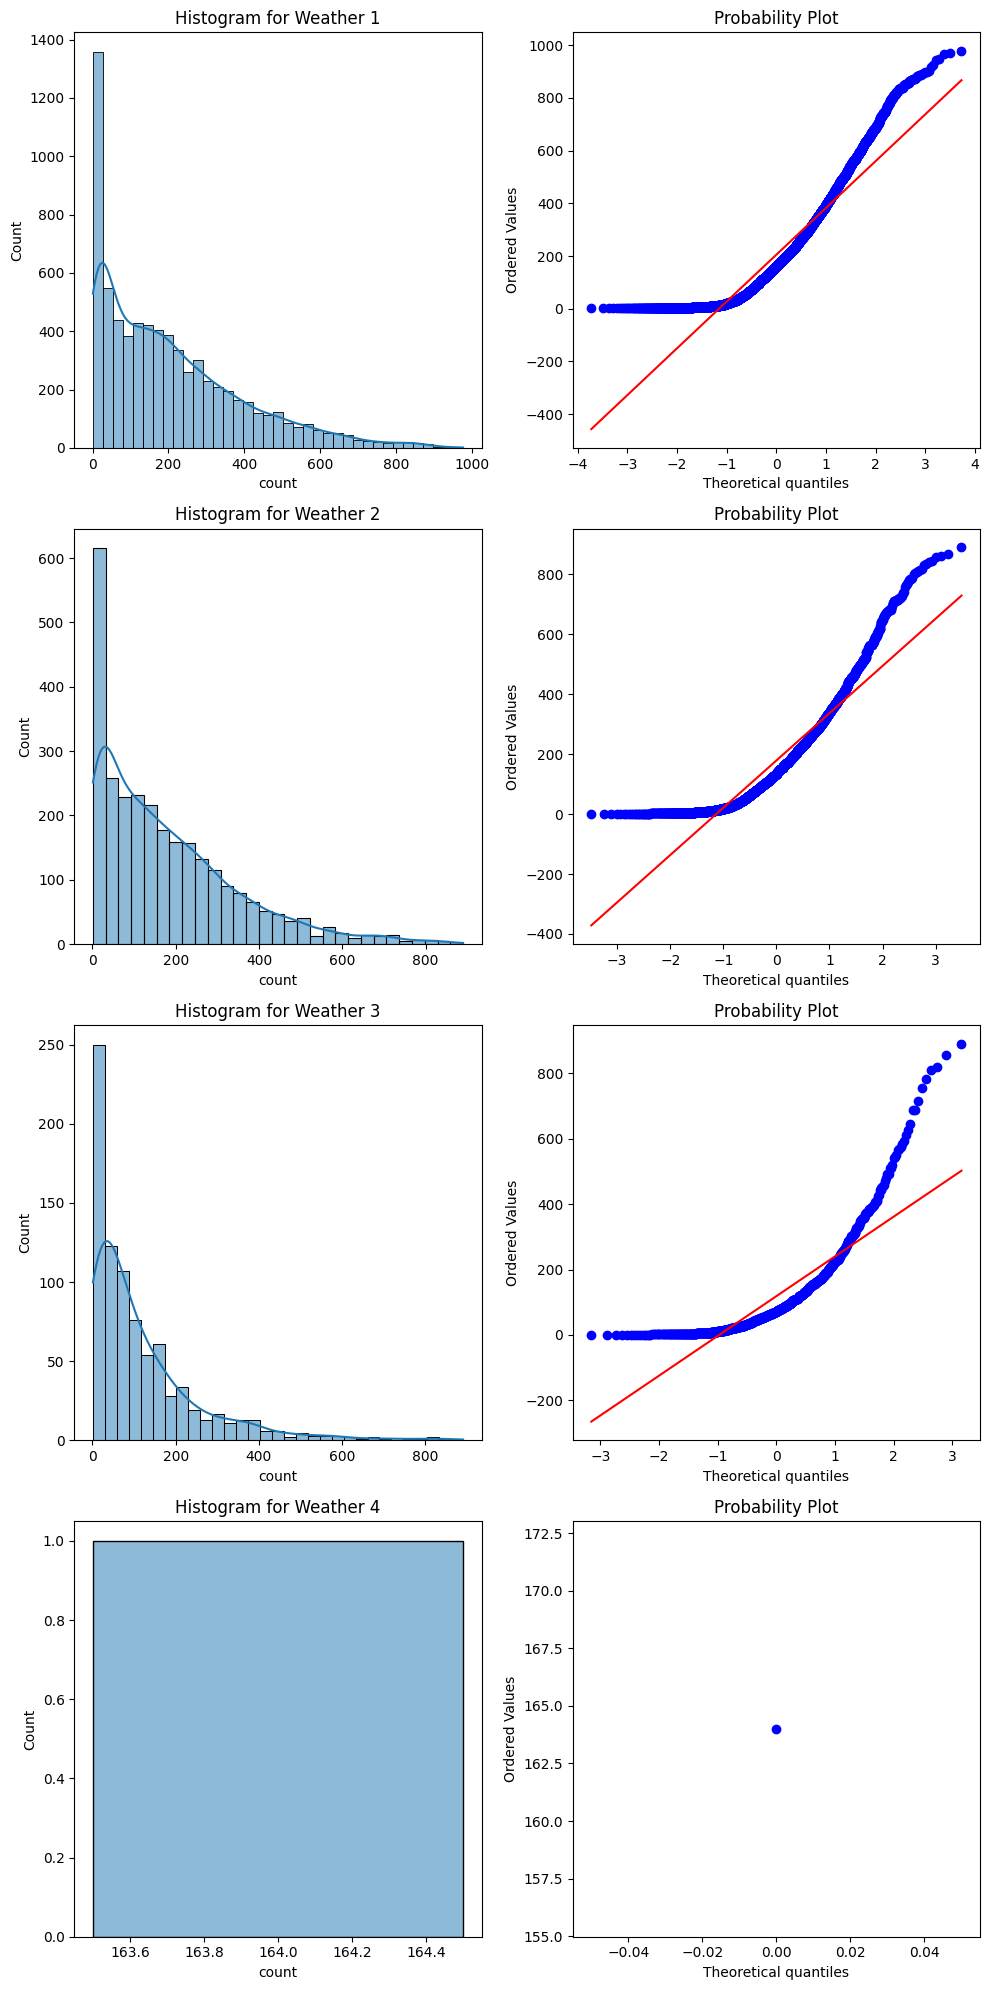

==> Shapiro Test for the group Weather 1:
Reject Null Hypothesis, Ho. So the group "Weather 1" doesn't follow normality.

==> Shapiro Test for the group Weather 2:
Reject Null Hypothesis, Ho. So the group "Weather 2" doesn't follow normality.

==> Shapiro Test for the group Weather 3:
Reject Null Hypothesis, Ho. So the group "Weather 3" doesn't follow normality.

Skipping Shapiro Test for the group Weather 4 due to insufficient data points.

==> Levene's Test:
Reject Null Hypothesis, Ho. So the groups Weather 1, Weather 2, Weather 3, Weather 4 don't have equal variances.



In [33]:
# Similiar to above, we'll check the same for weather conditions as well

# To check if no. of cycles rented is similar or different in different weather

# So,
# Null Hypothesis, Ho = The mean number of bikes rented is same across all weather conditions
# Alternate Hypothesis, Ha = At least one weather condition has a different mean number of bikes being rented.

weather_1_users = df[df['weather'] == 1]['count']
weather_2_users = df[df['weather'] == 2]['count']
weather_3_users = df[df['weather'] == 3]['count']
weather_4_users = df[df['weather'] == 4]['count']

# Assumptions tests
# Visual plot to check for Normality and Homoscedasticity
visual_plot_check(weather_1_users, weather_2_users, weather_3_users, weather_4_users, labels=["Weather 1", "Weather 2", "Weather 3", "Weather 4"])

# Shapiro Test for Normality:
do_shapiro(weather_1_users, weather_2_users, weather_3_users, weather_4_users, labels=["Weather 1", "Weather 2", "Weather 3", "Weather 4"], sample_size=1000)

#Levene's Test for Equal variances
do_levene(weather_1_users, weather_2_users, weather_3_users, weather_4_users, labels=["Weather 1", "Weather 2", "Weather 3", "Weather 4"])


- Weather 1, 2, 3 doesn't follow normality as per the graph and Shapiro's tests.
- Weather 4 doesn't have enough data points.
- The bike counts across different weather conditions don't have equal variances.
- We'll proceed with one-way ANOVA anyway and see the results.

In [34]:

# Null Hypothesis, Ho = The mean number of bikes rented is same across all weather conditions
# Alternate Hypothesis, Ha = At least one weather condition has a different mean number of bikes being rented.

f_stat_weather, weather_anova_p_value = f_oneway(weather_1_users, weather_2_users, weather_3_users, weather_4_users)

print("Test Statistic : ", f_stat_weather)
print("P-value : ", weather_anova_p_value)
print("")
weather_result=reject_or_fail_to(weather_anova_p_value, alpha)
print("==> ANOVA test result for the Weather conditions: \n", weather_result)

Test Statistic :  65.53024112793271
P-value :  5.482069475935669e-42

==> ANOVA test result for the Weather conditions: 
 Reject Null Hypothesis, Ho.


We have enough statistical evidence to confirm that weather condition affects the number of bikes being rented. This makes sense as people normally would not prefer riding bikes at all or specific weather conditions.

---

In [35]:
# Chi-square test to check if Weather is dependent on the Season

# Both are categorical variables. 

# Ho : Weather is independent of the season.
# Ha : Weather is dependent on the season.

weather_season_contingency_table = pd.crosstab(df['weather'], df['season'])
weather_season_contingency_table

weather_seasons_chi2_stat, weather_seasons_p_value, dof, expected = chi2_contingency(weather_season_contingency_table)

In [36]:
weather_season_contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [37]:
np.set_printoptions(suppress=True, precision=2)
expected.round(2)

array([[1774.55, 1805.6 , 1805.6 , 1806.26],
       [ 699.26,  711.49,  711.49,  711.75],
       [ 211.95,  215.66,  215.66,  215.74],
       [   0.25,    0.25,    0.25,    0.25]])

In [38]:
# Degree of freedom -> (rows - 1 ) * (cols -1 )
print(dof)

9


#### Assumption observations:

- For the 'weather' and 'season' combination, most cells in the contingency table have an expected frequency count well above 5. This satisfies the requirement for a valid chi-square test.
- The 'weather' condition 4 (representing the most adverse weather conditions) has very few observations, and the expected frequency counts for this category are less than 0.5. This indicates that a chi-square test may not provide reliable results due to the extremely low frequency of this weather condition.
- So we'll confirm our hypothesis

In [39]:
# Ho : Weather is independent of the season.
# Ha : Weather is dependent on the season.

print("Test Statistic : ", weather_seasons_chi2_stat)
print("P-value : ", weather_seasons_p_value)
print("")
weather_seasons_chi2_result=reject_or_fail_to(weather_anova_p_value, alpha)
print("==> Chi Square test result: \n", weather_seasons_chi2_result)

Test Statistic :  49.15865559689363
P-value :  1.5499250736864862e-07

==> Chi Square test result: 
 Reject Null Hypothesis, Ho.


This means that weather and season are dependent variables.

---

## Insights
- Bike rentals peak during morning and evening commute hours.
- Late nights see the fewest rentals.
- Rentals increase from January to June, peak in June, and decline till December.
- June, July, and August have the highest number of rentals, likely due to favorable weather and outdoor activities.
- Bike rentals on working days show a dual peak pattern corresponding to commute hours, while non-working days have a more spread out distribution peaking around mid-day.
- Clear to partly cloudy days witness the highest number of rentals.
- Adverse weather conditions like heavy rain, snow, and fog see a significant drop in bike rentals.
- There's a positive correlation between temperature and bike rentals across all weather conditions. Rentals increase as temperatures rise, with the relationship being most pronounced on clear days.
- Humidity has a slight negative correlation with bike rentals. Windspeed has a weak correlation with bike rentals.
- Certain weather conditions and working day scenarios have outliers, which may be due to special events, anomalies, or other unaccounted factors.
- Monthly trends show peak bike usage during summer and fall.
- Hourly trends highlight two main peaks corresponding to typical commute hours.
- Rentals are influenced by day of the week, with weekdays seeing more registered users.

## Recommendations

- Focus operational and maintenance activities during late-night hours when rentals are the least.
- Increase bike inventory during peak months (June, July, August) and during peak hours on working days.
- Offer promotions or discounts during off-peak hours and months to encourage and distribute rentals more evenly.
- Consider integrating weather forecasting into the app and sending users alerts or recommendations based on upcoming weather conditions.
- Investigate the reasons behind outliers in rentals, especially during adverse weather conditions.
- For clear and mildly cloudy days, especially during peak months, ensure there are enough docking stations and bikes available in high-demand areas.
- On adverse weather days, consider sending safety tips and guidelines to users. For extreme conditions, consider temporarily pausing the service for user safety.
- Consider introducing weather-based promotions.
- Increase marketing efforts during the fall season, when rentals are highest.
- Tailor promotions and marketing campaigns targeting casual users specifically for weekends.
- Introduce special commuter packages or subscription deals to cater to commuters.
- Consider organizing group bike tours or events on non-working days to boost rentals.
- Investigate the reasons behind outliers in the dataset to understand what drives spikes in rentals.
- Invest in infrastructure like covered bike lanes or provide rain gear to mitigate the decline in rentals during adverse weather conditions.
- Consider loyalty programs or referral schemes to encourage registered users to use the service more consistently and bring in new users.
- Collect feedback from users specifically during different weather conditions, seasons, and times to understand their needs and pain points better.
- Expand data collection to include factors like special events and promotions to offer deeper insights into what influences bike rentals.
- Develop a contingency plan for unfavorable weather conditions, such as a more flexible cancellation policy, offering alternative transport options, or providing information to users on weather forecasts.

---